In [26]:
class G(object):
    def __init__(self, volm,vola):
        if vola>volm:
            raise Exception('out of volume')
        self.vola = vola
        self.volm = volm
        if self.vola<self.volm:
            self.etat = False
        else:
            self.etat =True
        if self.vola==0:
            self.vide = True
        else:
            self.vide = False
    def remp(self,other):
        if not other.etat and not self.vide:
            aco = other.vola
            acs = self.vola
            other.vola=(aco+acs)*(aco+acs<other.volm)+(other.volm)*(aco+acs>=other.volm)
            self.vola=((acs+aco)-other.vola)*((acs+aco)-other.vola>0)
                
    def __add__(self,other):
        if not other.etat and not self.vide:
            aco = other.vola
            acs = self.vola
            other.vola=(aco+acs)*(aco+acs<other.volm)+(other.volm)*(aco+acs>=other.volm)
            self.vola=((acs+aco)-other.vola)*((acs+aco)-other.vola>0)            

In [27]:
def niv(a,b,c,ini=(8,0,0)):
    LL=set()
    his={}
    g8,g5,g3=G(8,a),G(5,b),G(3,c)
    g8+g5
    if (g8.vola,g5.vola,g3.vola) not in {ini,(a,b,c)} :
        LL.update({(g8.vola,g5.vola,g3.vola)})
        his.update({'1':(g8.vola,g5.vola,g3.vola)})
    g8,g5,g3=G(8,a),G(5,b),G(3,c)
    g8+g3
    if (g8.vola,g5.vola,g3.vola) not in {ini,(a,b,c)} :
        LL.update({(g8.vola,g5.vola,g3.vola)})
        his.update({'2':(g8.vola,g5.vola,g3.vola)})
    g8,g5,g3=G(8,a),G(5,b),G(3,c)
    g5+g8
    if (g8.vola,g5.vola,g3.vola) not in {ini,(a,b,c)}  :
        LL.update({(g8.vola,g5.vola,g3.vola)})
        his.update({'3':(g8.vola,g5.vola,g3.vola)})
    g8,g5,g3=G(8,a),G(5,b),G(3,c)
    g5+g3
    if (g8.vola,g5.vola,g3.vola) not in {ini,(a,b,c)}  :
        LL.update({(g8.vola,g5.vola,g3.vola)})
        his.update({'4':(g8.vola,g5.vola,g3.vola)})
    g8,g5,g3=G(8,a),G(5,b),G(3,c)
    g3+g8
    if (g8.vola,g5.vola,g3.vola) not in {ini,(a,b,c)}  :
        LL.update({(g8.vola,g5.vola,g3.vola)})
        his.update({'5':(g8.vola,g5.vola,g3.vola)})
    g8,g5,g3=G(8,a),G(5,b),G(3,c)
    g3+g5
    if (g8.vola,g5.vola,g3.vola) not in {ini,(a,b,c)}  :
        LL.update({(g8.vola,g5.vola,g3.vola)})
        his.update({'6':(g8.vola,g5.vola,g3.vola)})
    return LL,his     

In [28]:
def gv(val,dic):
    return list(dic.keys())[list(dic.values()).index(val)]

def uppath(target,ini):
    global path
    temp=set()
    for a  in niv(*ini)[1] :
        if niv(*ini)[1][a] not in path.values():
            path.update({str(int(gv(ini,path))*10+int(a)):niv(*ini)[1][a]})
            temp.update({(niv(*ini)[1][a])})
    return temp 

In [29]:
def solve(target,ini):
    global path
    depth=list(uppath(target,ini))
    for v in depth:
        if target in v:
            return gv(v,path),path
        else:
            solve(target,v)
    return path          

In [65]:
path={'1': (8,0,0)}
solve(2,(8,0,0))

{'1': (8, 0, 0),
 '11': (3, 5, 0),
 '12': (5, 0, 3),
 '121': (0, 5, 3),
 '126': (5, 3, 0),
 '1262': (2, 3, 3),
 '114': (3, 2, 3)}

In [66]:
L=[k for k in [(u,v) for u in path.keys() for v in [k for k in path.keys() if len(k)==len(u)+1]] if k[0] in k[1] ]

In [67]:
f=lambda u:(int(u[0]),int(u[1]))

In [68]:
LL=list(map(f,L))
LL

[(1, 11), (1, 12), (11, 114), (12, 121), (12, 126), (126, 1262)]

In [69]:
LL
mapping={int(u):path[u] for u in path }
mapping

{1: (8, 0, 0),
 11: (3, 5, 0),
 12: (5, 0, 3),
 121: (0, 5, 3),
 126: (5, 3, 0),
 1262: (2, 3, 3),
 114: (3, 2, 3)}

In [70]:
import networkx as nx
g=nx.DiGraph()
g.add_edges_from(LL)
h=nx.relabel_nodes(g, mapping)
p=nx.drawing.nx_pydot.to_pydot(h)
p.write_png('example.png')

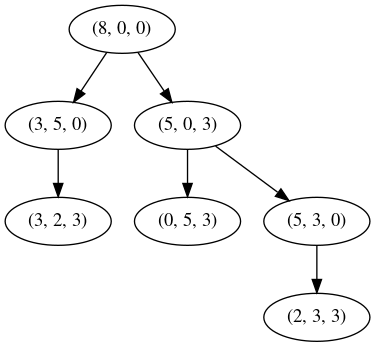

In [71]:
from IPython.display import Image
Image(filename='example.png') 